In [15]:
# reference: https://networkx.org/documentation/stable/auto_examples/index.html

import pandas as pd
import networkx as nx
import json
import matplotlib.pyplot as plt
from random import sample
import math
import warnings
import matplotlib as mpl

warnings.filterwarnings("ignore") # to ignore warnings regarding special characters in the user name

In [2]:
tweets = pd.read_csv('climatehoax_extended') 
# read downloaded tweets, should be located in the same path as the code (otherwise specify the path)

In [3]:
df = tweets.copy()
df = df.drop(columns=['created_at', 'lang', 'entities', 'media', 'geo']) # remove columns we don't use now
df.head(10)

,id,text,author_id,in_reply_to_user_id,author,referenced_tweets
0,1223027619748286464,RT @ThiagoMaia2503: The ice of the Svalbard se...,781531692,NaN,"{""protected"":false,""id"":""781531692"",""url"":"""",""...","[{""type"":""retweeted"",""id"":""1222932034064134145..."
1,1223021903658377216,@mgrant76308 Go back to school is freezing out...,139322897,61851477.0,"{""protected"":false,""id"":""139322897"",""url"":"""",""...","[{""type"":""replied_to"",""id"":""122301755971853517..."
2,1223017455188090881,Remember what is happening behind the curtain:...,1216561117960511491,NaN,"{""protected"":false,""id"":""1216561117960511491"",...",NaN
3,1223014846976757760,"""Global Warming""\n\n🙄\n\n#ClimateChange\n#Clim...",573935794,NaN,"{""protected"":false,""id"":""573935794"",""url"":""htt...","[{""type"":""quoted"",""id"":""1222793555464290304"",""..."
4,1223012516084830208,RT @MannixZegge: Het merk Greta.... Nuff said....,2447038212,NaN,"{""protected"":false,""id"":""2447038212"",""url"":"""",...","[{""type"":""retweeted"",""id"":""1223011624249892864..."
5,1223011624249892864,Het merk Greta.... Nuff said... #ClimateHoax h...,1213922882847293441,NaN,"{""protected"":false,""id"":""1213922882847293441"",...","[{""type"":""quoted"",""id"":""1222791538490650624"",""..."
6,1222997652759109632,RT @deanyb71: @MonikaHeydeck @AndyOldoak It’s ...,258316834,NaN,"{""protected"":false,""id"":""258316834"",""url"":"""",""...","[{""type"":""retweeted"",""id"":""1222994182849036289..."
7,1222997284549537793,"Oh, please give us more of that #ClimateHoax 😤...",486245623,NaN,"{""protected"":false,""id"":""486245623"",""url"":"""",""...","[{""type"":""quoted"",""id"":""1222647500370325506"",""..."
8,1222997108736843776,RT @deanyb71: @MonikaHeydeck @AndyOldoak It’s ...,3070097967,NaN,"{""protected"":false,""id"":""3070097967"",""url"":"""",...","[{""type"":""retweeted"",""id"":""1222994182849036289..."
9,1222996853568024577,@PrisonPlanet Climate Change (man-made) is a c...,495882311,18643437.0,"{""protected"":false,""id"":""495882311"",""url"":"""",""...","[{""type"":""replied_to"",""id"":""122296838227584614..."


In [45]:
df[df.author_id==867077976210513920] # looking at the user 'voice of insane'

,id,text,author_id,in_reply_to_user_id,author,referenced_tweets
16,1222973621137702913,@DukeMarcude @GeraldKutney Ask him about eatin...,867077976210513920,5.954105e+08,"{""protected"":false,""id"":""867077976210513920"",""...","[{""type"":""replied_to"",""id"":""122295367211780096..."
24,1222957344281321472,@GZzyzyx @GeraldKutney Dear Genie... 😂 The #cl...,867077976210513920,1.210986e+18,"{""protected"":false,""id"":""867077976210513920"",""...","[{""type"":""replied_to"",""id"":""122294906047200460..."
25,1222955581985755138,"@inmyownfashion @GeraldKutney In fact, that is...",867077976210513920,1.187496e+18,"{""protected"":false,""id"":""867077976210513920"",""...","[{""type"":""replied_to"",""id"":""122294930097770086..."
26,1222953428772630528,@SNISGeneva @ETH_en WHAT? 😂 😂 😂 you are discus...,867077976210513920,9.481427e+08,"{""protected"":false,""id"":""867077976210513920"",""...","[{""type"":""replied_to"",""id"":""122295239321162956..."
27,1222953130507239432,@CSRtist Are your fancy eyewear included in th...,867077976210513920,2.729372e+09,"{""protected"":false,""id"":""867077976210513920"",""...","[{""type"":""replied_to"",""id"":""122295244357675827..."
...,...,...,...,...,...,...
9305,1222902479345504257,@GeraldKutney This is the proof that #climate...,867077976210513920,9.044090e+08,"{""location"":""Always QUESTION "",""url"":"""",""usern...","[{""type"":""replied_to"",""id"":""122289160339368345..."
9306,1222901050916528131,@GrannyRevHub GHG are not a problem. The GHE i...,867077976210513920,1.412828e+09,"{""location"":""Always QUESTION "",""url"":"""",""usern...","[{""type"":""replied_to"",""id"":""122288758274230272..."
9310,1222898675896082435,@johnshaplin @yanisvaroufakis @ProSyn This fro...,867077976210513920,2.213013e+09,"{""location"":""Always QUESTION "",""url"":"""",""usern...","[{""type"":""replied_to"",""id"":""122269192433694720..."
9311,1222891218226446338,"@jk_eaton No shit, Sherlock. Greta, koalas &am...",867077976210513920,7.596459e+08,"{""location"":""Always QUESTION "",""url"":"""",""usern...","[{""type"":""replied_to"",""id"":""122288953361377280..."


In [5]:
def create_network(sample_size, seed=7):
    '''
    create network based on the tweets
    sample size: number of tweets you want to sample
    seed: to control random sampling (different seeds result in different random sampling)
    '''
    g = nx.DiGraph() # create directed graph in networkx
    df_small = df.sample(sample_size, random_state=seed)
    
    weights = dict()
    usernames = dict()
    tweet_texts = dict()
    
    for col in df_small.itertuples(index = False): # iterate through rows of the dataframe
        author = col.author_id # save author id to the variable 'author'
        author_json = json.loads(col.author) # load json that is saved in the column 'author'
        usernames[author]=author_json['name'] # save key-value pair: key=author id, value=username
        # print(aut['name'])
        tweet_texts[author] = col.text # save tweet texts for later (not used now)
        reply_to = col.in_reply_to_user_id # save the id from 'in_reply_to_user_id' column to 'reply_to'

        g.add_node(author) # add node with author id 
        # if we move this line into 'if not math.isnan(reply_to), we will only save the nodes that is replying to someone
        # that can be one way of filtering
        
        if author not in weights.keys(): # if this author appeard for the first time, create empty dictionary
            weights[author] = {}

        if not math.isnan(reply_to): 
            # if there is 'in_reply_to_user_id' 
            # the value is nan when the tweet is not replying to anyone
            g.add_node(reply_to) # save the person who is 'replied to' by the tweet we're looking at
            
            if rel not in weights[author].keys(): # count how many times this happened between two users
                weights[author][reply_to] = 1
            else:
                weights[author][reply_to] += 1
                
            g.add_edge(author, reply_to, weight=weights[author][reply_to]) # add edge to the network
    
    return g, usernames, tweet_texts

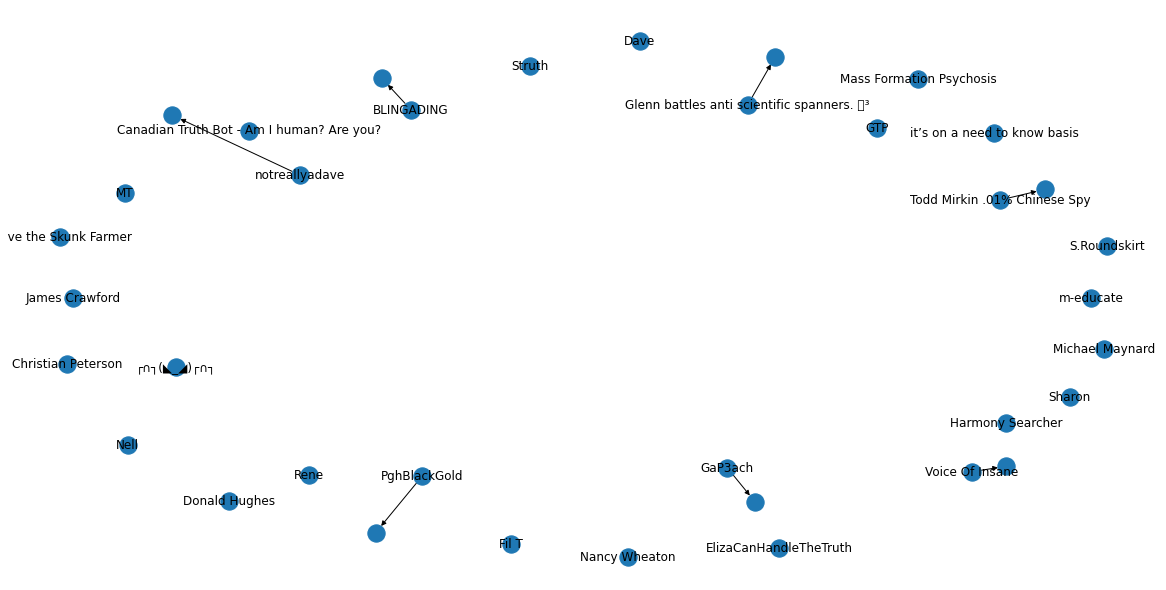

In [47]:
# using default graph
g, usernames, tweet_texts = create_network(30)
plt.gcf().set_size_inches(16, 8)
plt.rc('axes', unicode_minus=False)
nx.draw(g, with_labels=True, labels=usernames)#, font_family='noto')
#nx.draw_networkx_labels(g, pos, font_size=10, font_family="sans-serif")


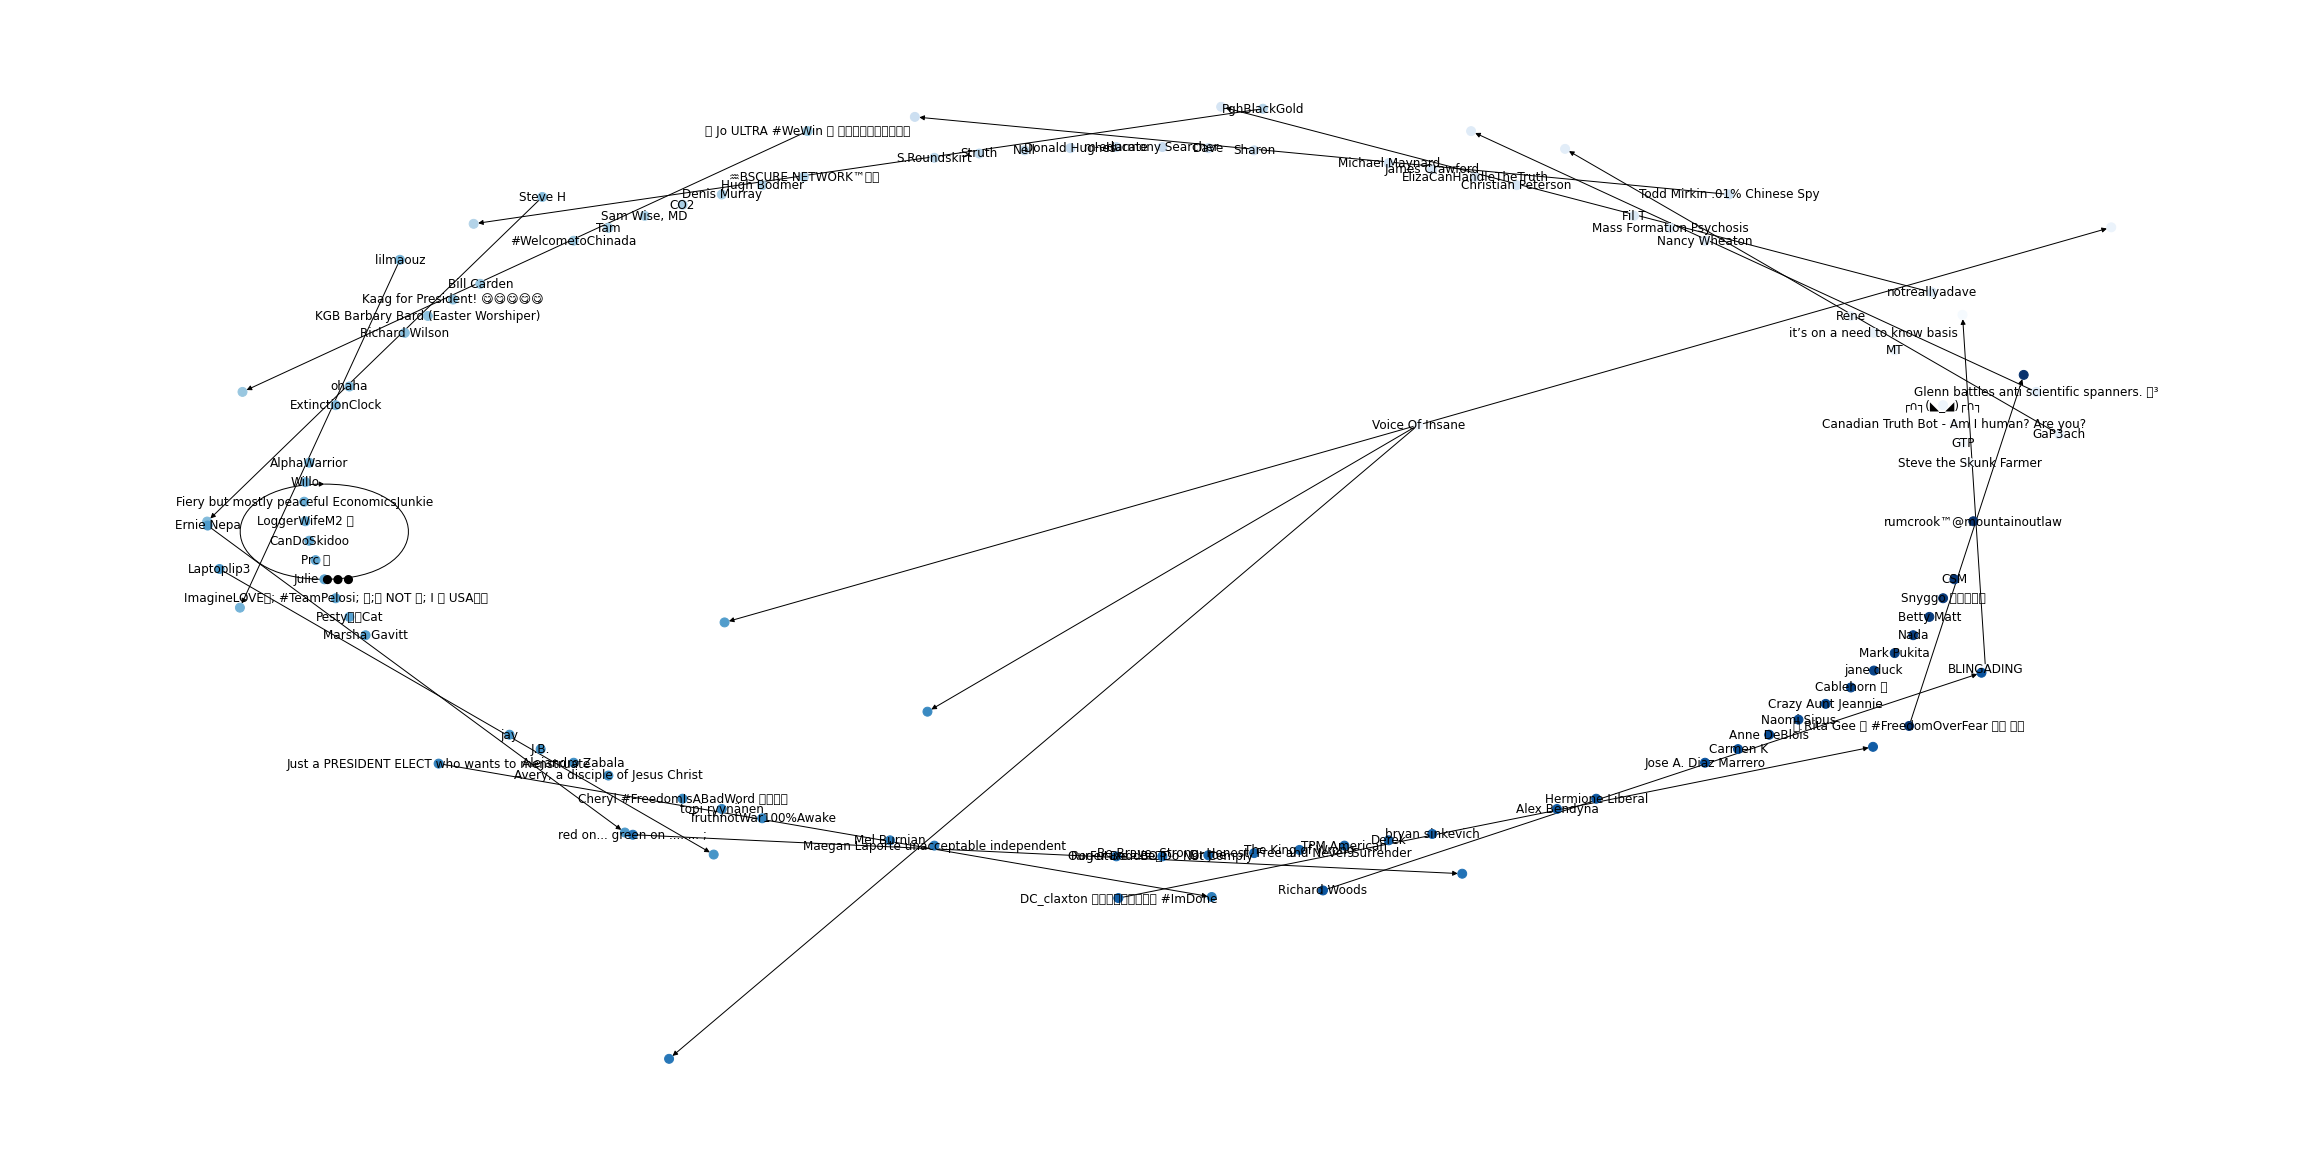

In [48]:
# using kamada kawai layout

plt.gcf().set_size_inches(32, 16)
g, usernames, _ = create_network(100)
#nx.draw(g, node_size=30, cmap=plt.cm.Blues, node_color=range(832))#, with_labels = True)
pos = nx.kamada_kawai_layout(g)

# edge_labels = nx.get_edge_attributes(g, "weight")
# nx.draw_networkx_edge_labels(g, pos, edge_labels)

nx.draw(g, 
        pos, 
        node_color=range(len(set(g.nodes))),  
        node_size=80, 
        cmap=plt.cm.Blues, 
        #edge_color=range(4), 
        #edge_cmap = plt.cm.Blues
        labels=usernames
       )


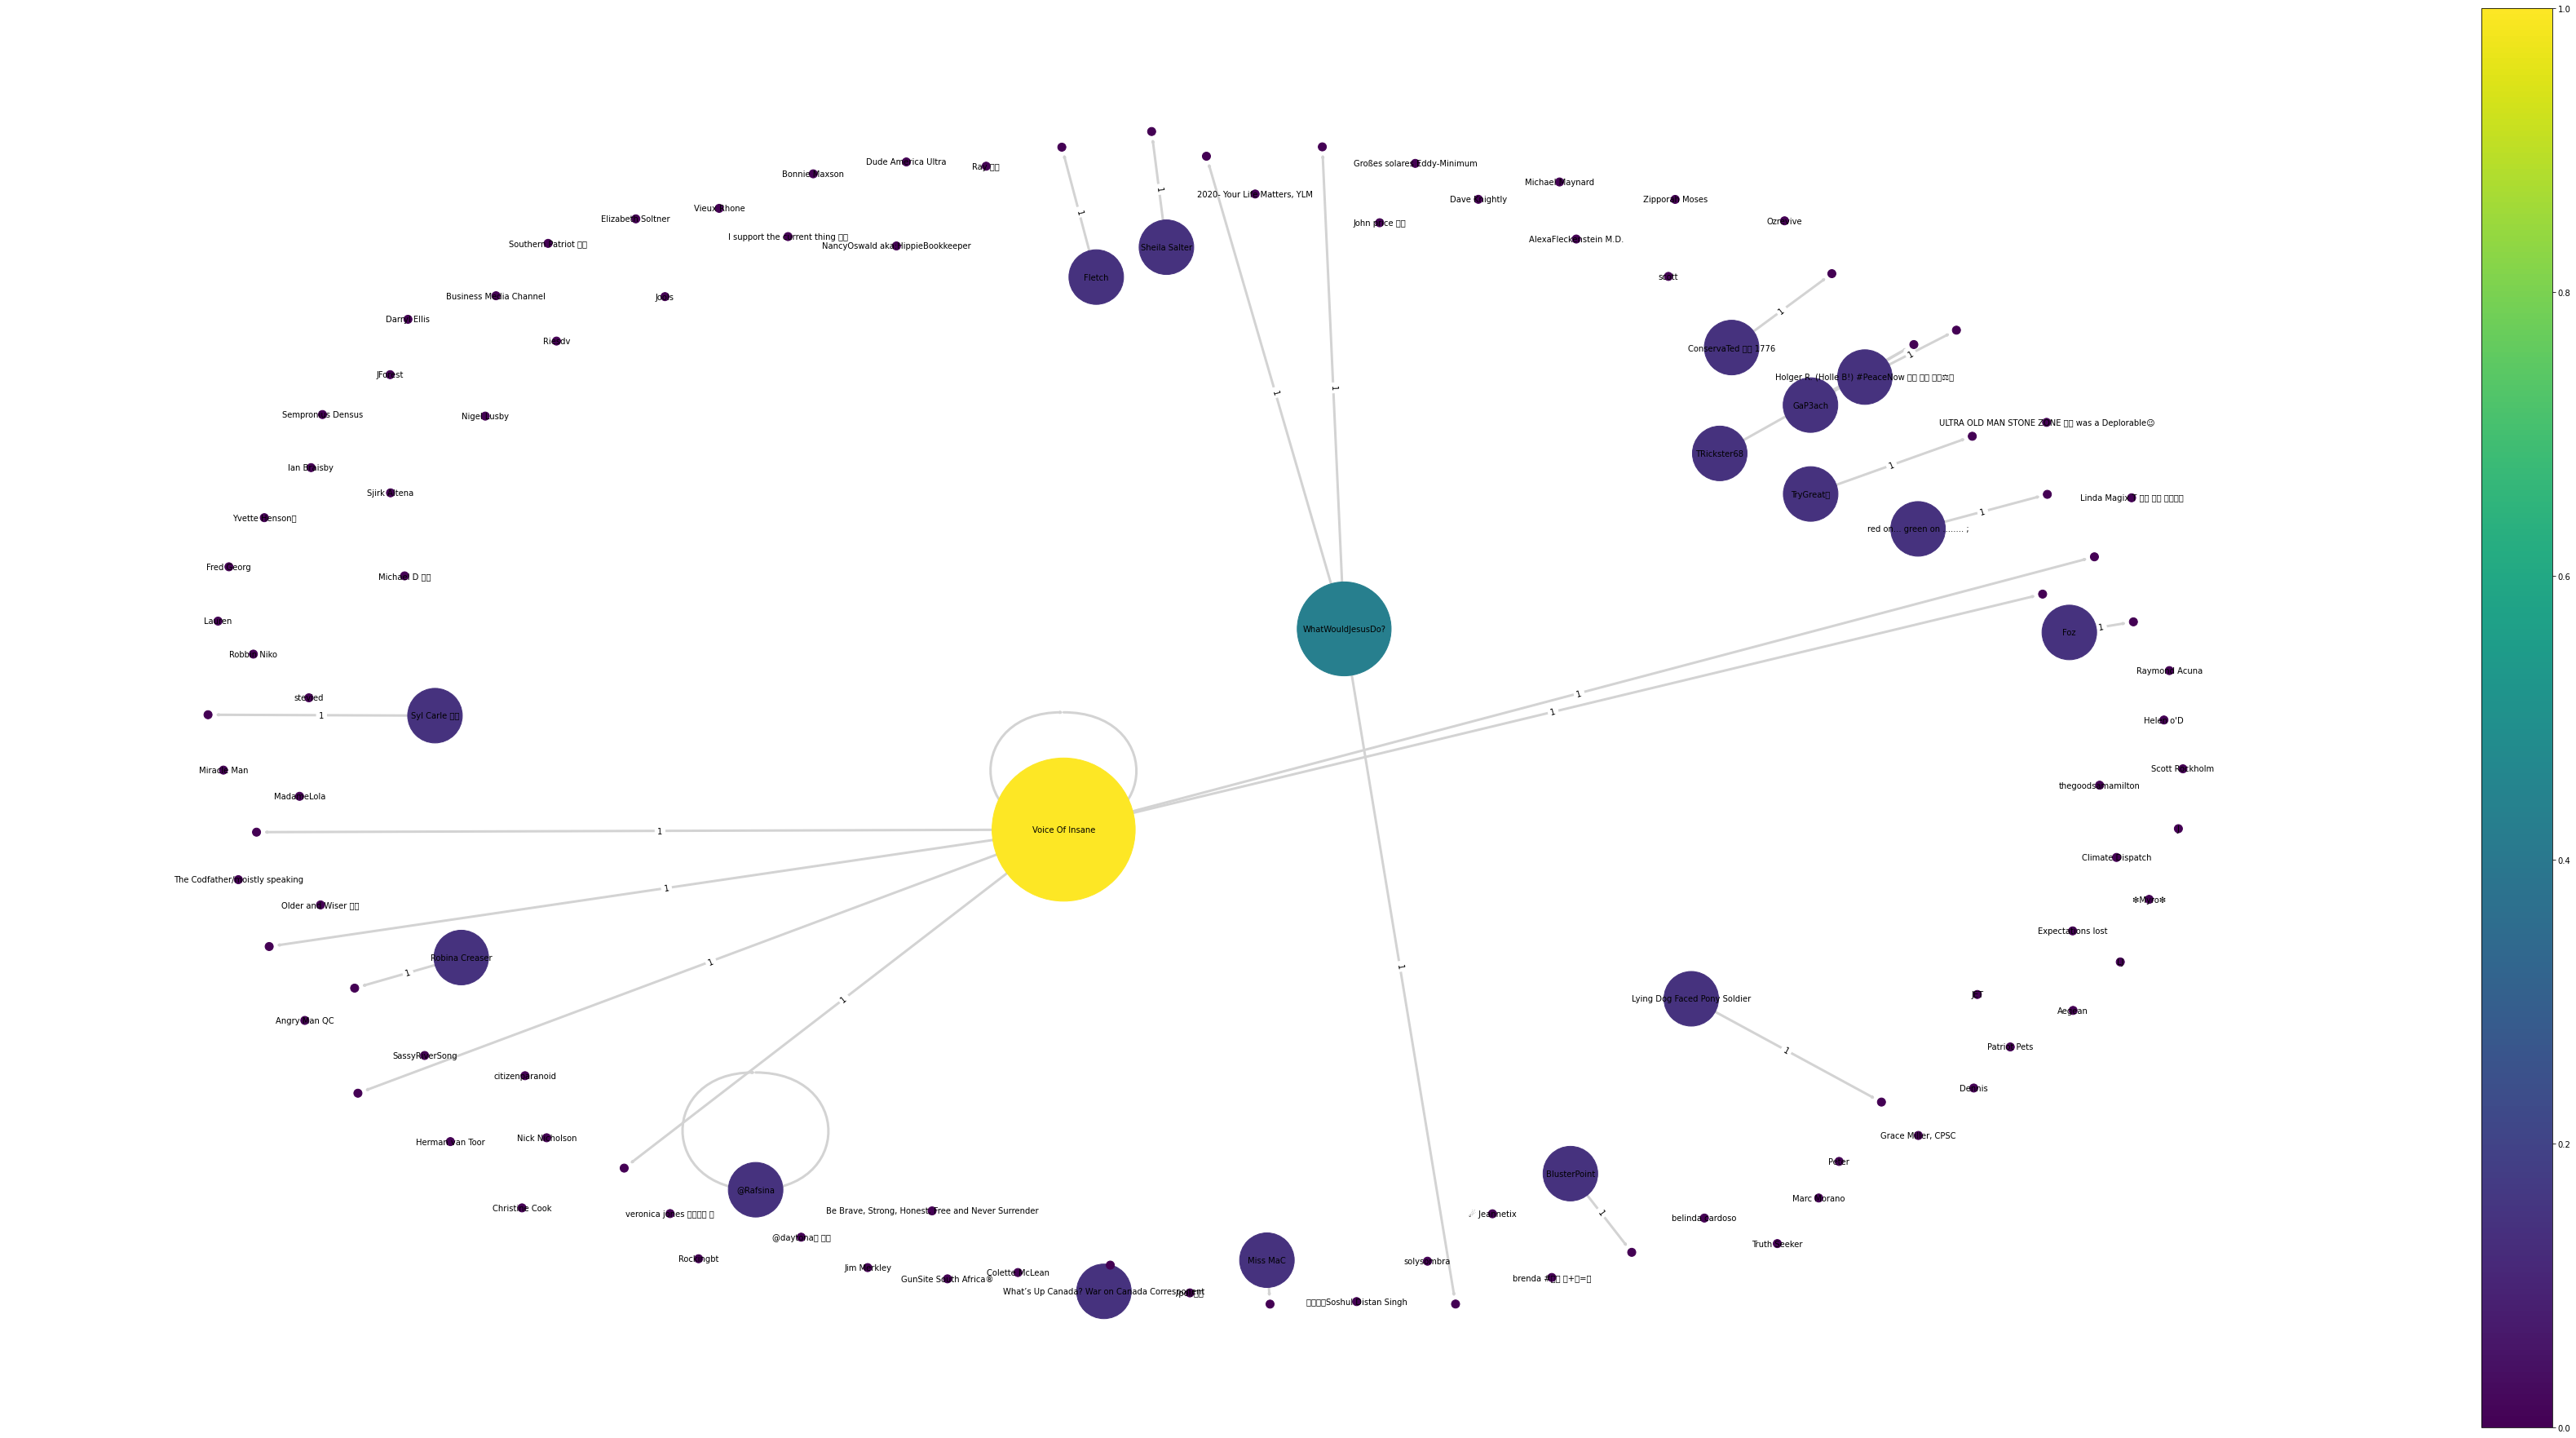

In [53]:
g, usernames, _ = create_network(sample_size=100, seed=5)
pos = nx.spring_layout(g, seed=77)

centrality = nx.out_degree_centrality(g)
centralities = [v*500000+100 for v in centrality.values()] # convert size of value for the plot

# set the width of edge according to the weight (how many times there was 'reply' relationship between two users)
edgewidth = [g.get_edge_data(u, v)['weight']*3 for u, v in g.edges()] # multiply 3 for the plot

# set size and color of the node according to the modified centrality values
nodes = nx.draw_networkx_nodes(g, pos, node_size=centralities, node_color=centralities)

# set the label of edge according to its weight
edge_labels = nx.get_edge_attributes(g, "weight")

edges = nx.draw_networkx_edges(
    g,
    pos,
    arrowstyle="->",
    arrowsize=edgewidth,
    width=edgewidth,
    edge_color='lightgrey',
    #edge_cmap=cmap,
)


# set labels for node (user name) and edge (weight of the edge)
nx.draw_networkx_labels(g, pos, font_size=10, font_family="sans-serif", labels=usernames)
nx.draw_networkx_edge_labels(g, pos, edge_labels)


# plot related features
cmap = plt.cm.viridis
pc = mpl.collections.PatchCollection(edges, cmap=cmap)
plt.colorbar(pc)
plt.gcf().set_size_inches(64, 32) # you can change the size of plot here
ax = plt.gca()
ax.set_axis_off()
plt.show()

In [55]:
centrality # to see if the user (id: 867077976210513920  'voice of insane') has the highest out degree centrality
sorted_centrality = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1], reverse=True)}
sorted_centrality

{867077976210513920: 0.06140350877192982,
 824423012745179136: 0.02631578947368421,
 1093048489355882497: 0.008771929824561403,
 2165541865: 0.008771929824561403,
 219178854: 0.008771929824561403,
 293455806: 0.008771929824561403,
 1073975276843888640: 0.008771929824561403,
 1356488054: 0.008771929824561403,
 1059562835334770688: 0.008771929824561403,
 22887776: 0.008771929824561403,
 1160616382972780545: 0.008771929824561403,
 438011665: 0.008771929824561403,
 54755372: 0.008771929824561403,
 1214270078344056832: 0.008771929824561403,
 936228202548285440: 0.008771929824561403,
 2477996347: 0.008771929824561403,
 91976338: 0.008771929824561403,
 127297608: 0.008771929824561403,
 1.1948045582679613e+18: 0.0,
 3150800516: 0.0,
 1114252239491805184: 0.0,
 26570595: 0.0,
 17201202.0: 0.0,
 50293935.0: 0.0,
 784826816309501954: 0.0,
 382559030: 0.0,
 624071090: 0.0,
 259960795: 0.0,
 151101551: 0.0,
 1927978586: 0.0,
 455349381: 0.0,
 1097762760014712832: 0.0,
 1031672825373962240: 0.0,
 94